# Predicting Heart Disease Diagnosis Using Classification

### Introduction:

Heart disease is the leading cause of death worldwide. Early diagnosis and treatment of heart disease is crucial to improve patients' outcomes and quality of life. Classification can help healthcare professionals more accurately and promptly diagnose heart disease and develop personalized treatment plans for patients. In this project, we aim to use the Heart Disease dataset from the UCI Machine Learning Repository to build a classification model that can predict whether or not a patient has heart disease. The Heart Disease dataset contains 303 instances and 14 attributes. 

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


#3 cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

#4 trestbps: resting blood pressure (in mm Hg on admission to the hospital)

#14 num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

In [2]:
name <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

heartdata <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",col_names = name) |>
    select(age, trestbps, chol, thalach,num)

heartdata

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,145,233,150,0
67,160,286,108,2
67,120,229,129,1
⋮,⋮,⋮,⋮,⋮
57,130,131,115,3
57,130,236,174,1
38,138,175,173,0


In [3]:
heartdata <- heartdata |>
    mutate(heart_disease = ifelse(num > 0, "yes", "no"))

heartdata

age,trestbps,chol,thalach,num,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
63,145,233,150,0,no
67,160,286,108,2,yes
67,120,229,129,1,yes
⋮,⋮,⋮,⋮,⋮,⋮
57,130,131,115,3,yes
57,130,236,174,1,yes
38,138,175,173,0,no


Data visualization:

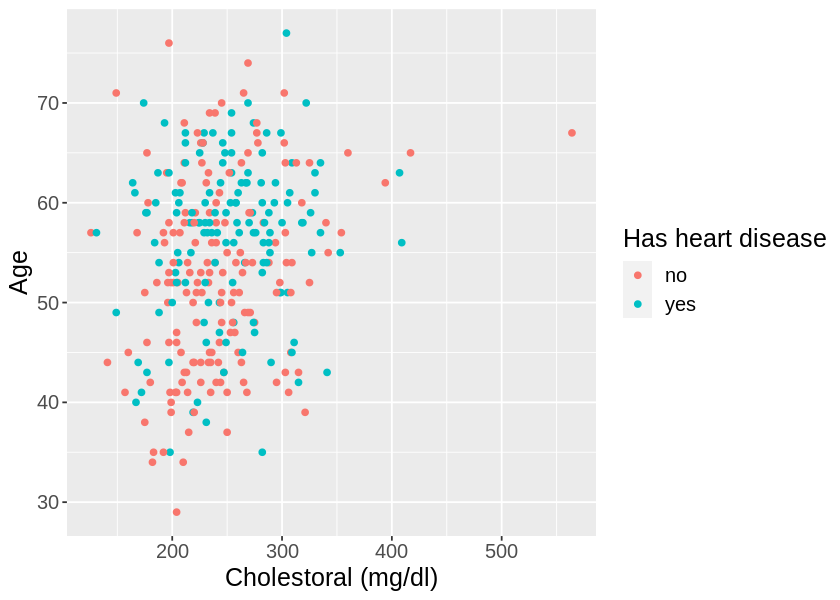

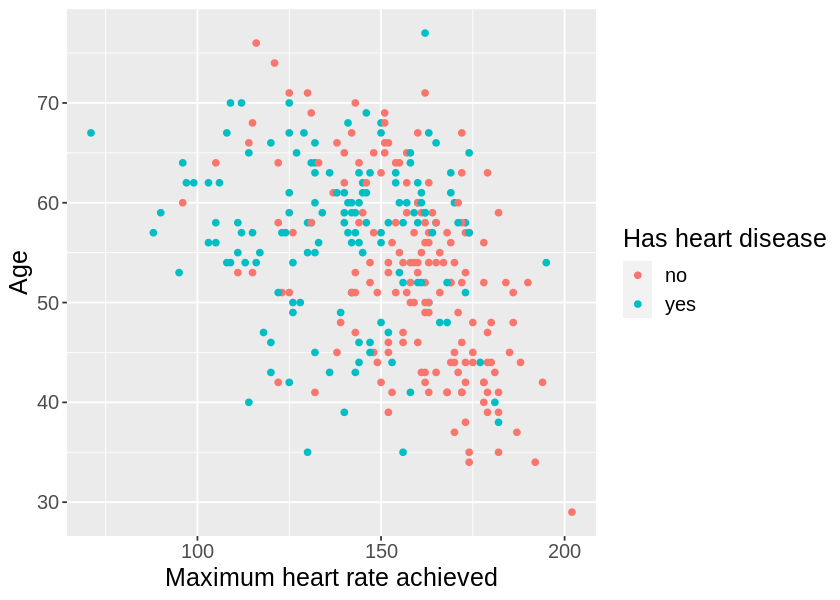

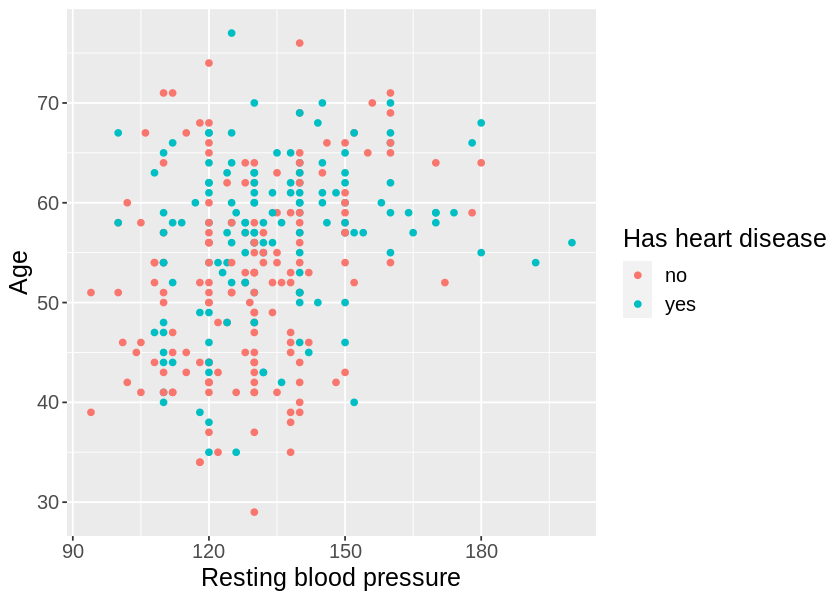

In [8]:
options(repr.plot.width = 7, repr.plot.height = 5)

p1 <- heartdata |>  
    ggplot(aes(x= chol, 
               y= age, 
               color = heart_disease)) +
        labs(x = "Cholestoral (mg/dl)",
             y = "Age",
            colour = 'Has heart disease') +
        geom_point(stat = "identity") +
        theme(text = element_text(size = 15))

p2 <- heartdata |>  
    ggplot(aes(x= thalach, 
               y= age, 
               color = heart_disease)) +
        labs(x = "Maximum heart rate achieved",
             y = "Age",
            colour = 'Has heart disease') +
        geom_point(stat = "identity") +
        theme(text = element_text(size = 15))

p3 <- heartdata |>  
    ggplot(aes(x= trestbps, 
               y= age, 
               color = heart_disease)) +
        labs(x = "Resting blood pressure",
             y = "Age",
            colour = 'Has heart disease') +
        geom_point(stat = "identity") +
        theme(text = element_text(size = 15))

layout(matrix(3:1, nrow = 1))

p1
p2
p3

In [14]:
heart_split <- initial_split(heartdata, prop = 0.75, strata = heart_disease)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

Summarize the number of people has or does not have heart disease and mean value of 'Cholestoral', 'Maximum heart rate' and 'Resting blood pressure' :

In [20]:
counts <- heartdata |>
group_by(heart_disease) |>
summarize (count = n())

mean <- 
colMeans(heartdata[ , c(2: 4)])

counts
mean

heart_disease,count
<chr>,<int>
no,164
yes,139


trestbps     chol  thalach 
131.6898 246.6931 149.6073

In [19]:
# set.seed(2023)

# heart_recipe <- recipe(heart_disease ~ age + trestbps + chol + thalach, data = heart_train) |>
#    step_scale(all_predictors()) |>
#    step_center(all_predictors())

In [ ]:
# knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
#       set_engine("kknn") |>
#       set_mode("classification")

# fruit_fit <- workflow() |>
#       add_recipe(fruit_recipe) |>
#       add_model(knn_spec) |>
#       fit(data = fruit_train)